## Симплекс алгоритъм

![George Danzig](https://news.stanford.edu/__data/assets/image/0016/82501/Dantzig_vertical.jpeg){width=80%}

![IBM 701 Console](https://upload.wikimedia.org/wikipedia/commons/a/af/IBM_701console.jpg){width=80%}

![IBM 701 Memory](https://upload.wikimedia.org/wikipedia/commons/5/5b/IBM_700_logic_module.jpg){width=80%}


# Пример 1

Нека разгледаме следната оптимизационна задача, в която търсим оптималния производствен план на пивоварна, която произвежда два вида бира: светла и тъмна и използва два ресурса: хмел и малц.

$$
\begin{align*}  
& x_1: \text{ светла бира (л.)}\\
& x_2: \text{ тъмна бира (л.)}
\end{align*}
$$

$$
\begin{align*}
\max & \quad z(x) = 5x_1 + 5x_2\\
\text{s.t.} \quad & 2x_1 + x_2 \leq 10 \text{ Хмел}\\
\quad & x_1 + 2x_2 \leq 8 \text{ Малц}\\
\quad & x_1, x_2 \ge 0\\
\end{align*}
$$

Първата ни стъпка е да приведем задачата с стандартен вид, като добавим допълнителни променливи, с които да преобразуваме неравенствата в равенства.

$$
\begin{align*}
\max z(x) & = 5x_1 + 5x_2\\
2x_1 + x_2 + s_1 & = 10 \text{ Хмел}\\
x_1 + 2x_2 + s_2 & = 8 \text{ Малц}\\
x_1, x_2, s_1, s_2 & \geq 0
\end{align*}
$$ {#eq-bier-canonical}

където $s_1, s_2$ са допълнителни неотрицателни променливи.

Допустимото множество е представено в @fig-feasible-region.


C:\Users\boyko\AppData\Local\Temp\ipykernel_28624\3686557604.py:28: RuntimeWarning: divide by zero encountered in divide
  y = (b[i] - A[i, 0] * x) / A[i, 1]
C:\Users\boyko\AppData\Local\Temp\ipykernel_28624\3686557604.py:28: RuntimeWarning: invalid value encountered in divide
  y = (b[i] - A[i, 0] * x) / A[i, 1]


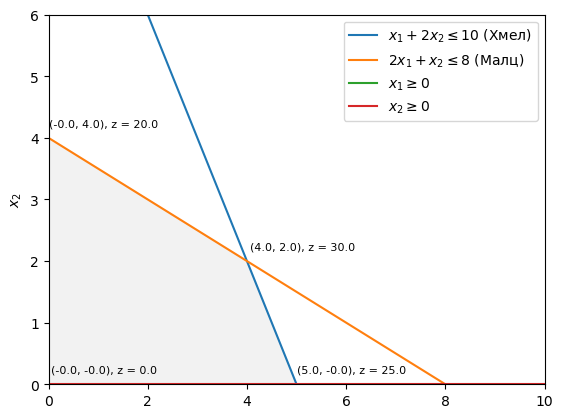

In [ ]:
#| label: fig-feasible-region
#| fig-cap: "Допустимо множество и стойност на целевата функция във върховете му."

import polytope as pc
import numpy as np
from matplotlib import pyplot as plt

A = np.array([[2, 1], [1, 2], [-1, 0], [0, -1]])
b = np.array([10, 8, 0, 0])

P = pc.Polytope(A, b)
P_extr = pc.extreme(P)

# Plot the polytope and its extreme points

fig, ax = plt.subplots()

# Plot the lines of the inequalities

x = np.linspace(-1, 10, 100)

constr_label = [r"$2x_1 + x_2 \leq 10$ (Хмел)",
                r"$x_1 + 2x_2 \leq 8$ (Малц)",
                r"$x_1 \geq 0$",
                r"$x_2 \geq 0$"]

for i in range(A.shape[0]):
    y = (b[i] - A[i, 0] * x) / A[i, 1]
    ax.plot(x, y, label=constr_label[i])


for i, p in enumerate(P_extr):
    z = np.dot(p, np.array([5, 5]))
    ax.annotate(f"({p[0]}, {p[1]}), z = {z}", (p[0], p[1]),
                textcoords="offset points",
                xytext=(40, 8), ha='center', fontsize=8)

# Shade the feasible region

ax.fill_between(x, 0, np.minimum((b[0] - A[0, 0] * x) / A[0, 1],
                                   (b[1] - A[1, 0] * x) / A[1, 1]),
                where=(x >= 0), color='gray', alpha=0.1)

ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

ax.set_label(r"$x_1$")
ax.set_ylabel(r"$x_2$")

ax.legend()



Тази система уравнения има две уравнения и четири променливи ($x_1, x_2, s_1, s_2$) и по тази причина има безкрайно много решения. Ако фиксираме две от променливите и ги сложим да са равни на нула,
бихме могли да намерим решение на системата уравнения.

:::{.callout-important}
## Базисни променливи

За да намерим решение на системата уравнения, фиксираме част от променливите да са равни на нула (брой променливи - брой уравнения = 2) и решаваме за останалите променливи. Защо не фиксираме частта от променливите да са равни на други стойности, например можем да фиксираме
$x_1 =2, x_2 = 1$ и пак ще намерим решение за $s_1$ и $s_2$. По този начин обаче ще намерим **вътрешна** точка от допустимото множество.
Точката $x_1 = 2, x_2 = 1$ не се намира на ръба на допустимото множество (@fig-feasible-region) и следователно не може да е оптималния производствен план.

:::

Когато всички ограничения са неравенства са всички от вида по-малко от $\leq$, какъвто е случая на тази задача, лесно можем да намерим едно решение,
като сложим хиксовете да са равни на нула: $x_1 = 0, x_2 = 0$. Тогава можем да решим за останалите две променливи: $s_1$ и $s_2$. Това първоначално решение наричаме начален опорен план (връх на допустимото множество).
Променливите, които сме фиксирали да са равни на нула наричаме **небазисни** променливите, а останалите наричаме **базисни**. 

$$
\begin{align*}
s_1 + (2x_1 + x_2) = 10\\
s_2 + (x_1 + 2x_2) = 8\\
\end{align*}
$${#eq-bier-restr}

или еквивалентно:

$$
\begin{align*}
s_1 = 10 - (2x_1 + x_2)\\
s_2 = 8 - (x_1 + 2x_2)\\
\end{align*}
$$

Tъй като изразите включващи $x_1$ и $x_2$ са равни на нула във върха, който разглеждаме в момента, от тази система лесно виждаме на колко са равни базисните променливи.

$$
\begin{align*}
s_1 = 10 \\
s_2 = 8 \\
\end{align*}
$$

Върха, в който се намира алгоритъмът в момента е $(x_1 = 0, x_2 = 0, s_1 = 10, s_2 = 8)$. Във @fig-feasible-region това е точката (0, 0) или с други думи това е производствен план, в който фирмата не произвежда нищо. $s_1 = 10$ означава, че в този производствен план фирмата разполага с 10 неизползвани единици хмел. $s_2 = 8$ означава, че фирмата разполага с 8 неизползвани единици малц.

Същото можем да направим и с целевата функция:

$$
\begin{align*}
Z = 0 - (-5x_1 - 5x_2)
\end{align*}
$${#eq-bier-obj}


| Итерация 1   |       |                        |          |          |       |       |            |
|---------|---------|----------|---------|---------|---------|---------|---------|
|             |       | $C_j$                  | 5        | 5        | 0     | 0     |            |
| Базисни пр. | $C_B$ | $X_B$                  | $x_1$    | $x_2$    | $s_1$ | $s_2$ | $X_B/x_1$  |
| $s_1$       | 0     | 10                     | 2        | 1        | 1     | 0     | 10 / 2 = 5 |
| $s_2$       | 0     | 8                      | 1         | 2        | 0     | 1     | 8 / 1 = 8  |
| $Z$         | 0     | $Z_j$                  | 0         | 0        | 0     | 0     |            |
|             |       | $\Delta_j = Z_j - C_j$ | 0 -5 = -5 | 0 -5 = -5 | 0     | 0   |            |


: Първоначална симплекс таблица {#tbl-simplex-1}

където $C_j$ са коефициентите на променливите в целевата функция, $C_B$ са коефициентите на базисните променливи в целевата функция. Редът $Z_j$ получаваме, като образуваме сумата на произведенията на коефициентите на променливите в системата уравнения и коефициентите на базисните променливи в целевата функция. За $x_1$ получаваме: $0 \cdot 2 + 0 \cdot 1 = 0$. Индексната оценка на $x_1$ получаваме, като от $Z_j$ извадим коефициента на $x_1$ в целевата функция: $\Delta_j = Z_j - C_j = 0 - 5 = -5$. По същия начин изчисляваме индексните оценки и на останалите променливи. Обърнете внимание, че тези индексни оценки съответстват на коефициентите на не-базисните променливи в целевата функция в @eq-bier-obj. Стойността на целевата функция получаваме, като съберем произведението на $X_B$ и $C_B$: $10 \cdot 0 + 8 \cdot 0 = 0$.

Индексните оценки ни показват с колко би се променила целевата функция, ако увеличим променливата с една единица. **Отрицателни** индексни оценки означават **увеличение** на целевата функция. В настоящия пример индексните оценки са отрицателни за $x_1$ и $x_2$, което означава, че печалбата на фирмата би нараснала, ако увеличим производството на светла или тъмна бира. Тъй като нарастването на печалбата е еднакво и за двата продукта избираме (произволно) да увеличим $x_1$.


:::{.callout-important}

Във всяка стъпка на симплекс алгоритъма променяме **само една** небазисна променлива. В настоящата стъпка увеличаваме $x_1$, т.е. от нула тя става положителна, но другата небазисна променлива ($x_2$) остава равна на нула.
:::

Въпросът сега е с колко най-много можем да увеличим производството на светла бира без да нарушаваме ограниченията. Отговор на този въпрос ни дава колонката $X_B / x_1$. Най-малката стойност в тази колонка е 5, което означава, че можем да увеличим $x_1$ най-много до 5. За да се убедим, че това е така, можем да заместим с $x_1 = 8$ в първото уравнение от системата [-@eq-bier-restr]:

$$
s_1 = 10 - (2 \cdot 8 + \underbrace{x_2}_{=0}) = -6
$$

Това уравнение е изпълнено за $s_1 = -6$, но това нарушава ограничението за неотрицателност на $s_1$. Избрахме да увеличим $x_1$ от $0$ в настоящото решение на 5, т.е. $x_1$ става базисна променлива. Видяхме, че най-малката стойност на $X_B / x_1$ е в първия ред на таблицата, който съответства на $s_1$. Това означава, че $s_1$ излиза от базиса и в следващото решение на системата ще е нула, а на нейно място в базиса влиза $x_1$.

$$
s_1 = 10 - (2 \cdot 5 - \underbrace{x_2}_{= 0}) \implies s_1 = 0.
$$

За да видим дали върхът $(x_1 = 5, x_2 = 0, s_1 = 0, s_2 = 4)$ е оптимален, изразяваме всяка базисна променлива ($x_1$ и $s_2$), както и целевата функция отново с не-базисни променливи, като искаме всяка базисна променлива да присъства само в едно уравнение и там коефициентът й да е 1. Във @fig-feasible-region това е точката (5, 0), в която производствения план е 5 единици светла бира, никакво производство на 
тъмна бира.  $s_1$ е нула, т.е. хмелът е напълно изчерпан, а $s_2$ е 4, т.е. остават 4 единици малц.

$$
\begin{align*}
s_1 & = 10 - 2x_1 - x_2\\
s_2 & = 8 - x_1 - 2x_2\\
\end{align*}
$$

Тук можем да разделим първото уравнение на 2, за да получим коефициент 1 пред $x_1:

$$
\begin{align*}
\frac{s_1}{2} & = 5 - x_1 - \frac{x_2}{2}\\
s_2 & = 8 - x_1 - 2x_2\\
\end{align*}
$$

Втората ни стъпка е да елиминираме $x_1$ във второто уравнение. За целта можем да извадим първото уравнение от второто:

$$
\begin{align*}
\frac{s_1}{2} & = 5 - x_1 - \frac{x_2}{2}\\
s_2 - \frac{s_1}{2} & = 8 - 5 - 0 - 2x_2 + \frac{x_2}{2}\\
\end{align*}
$$


:::{.callout-note}
## Системата уравнения в базисен вид

Най-накрая, системата в базисен вид (всяка базисна променлива само в едно уравнение и в него с коефициент 1) е:

$$
\begin{align*}
x_1 + \left(\frac{1}{2}x_2 + \frac{1}{2}s_1 \right)= 5\\
s_2 + \left(\frac{3}{2}x_2 -\frac{1}{2}s_1 \right) = 3
\end{align*}
$${#eq-bier-restr-2}

Изразяваме и целевата функция само с небазисни променливи, което в случая означава да заместим
$x_1$ в предишното й представяне ($z = 0 - (-5x_1 - 5x_2)$).

$$
\begin{align*}
& z = 5 - \left(5 - \frac{1}{2}s_1 - \frac{1}{2}x_2\right) + 5x_2 \implies \\
& z = 25 - \left(- \frac{5}{2} x_2 + \frac{5}{2}s_1 \right)
\end{align*}
$$

:::

При трансформирането на @tbl-simplex-1 в @tbl-simplex-2 правим абсолютно същото. Разделяме реда $x_1$ на $2$ (коефициентът пред $x_1$) и след това изваждаме първия ред от втория ред, за да елиминираме $x_1$ от втория ред.


| Итерация 2  |       |            |       |       |       |       |                |
|-------------|-------|------------|-------|-------|-------|-------|----------------|
|             |       | $C_j$      | 5     | 5     | 0     | 0     |                |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$ | $x_2$ | $s_1$ | $s_2$ | $X_B/x_2$      |
| $x_1$       | 5     | 5          | 1     | 1/2   | 1/2   | 0     | 5 / (1/2) = 10 |
| $s_2$       | 0     | 3          | 0     | 3/2   | -1/2  | 1     | 3 / (3/2) = 2  |
| $Z = 25$    |       | $Z_j$      | 5     | 5/2   | 5/2   | 0     |                |
|             |       | $\Delta_j$ | 0     | -5/2  | 5/2   | 0     |                |

: Симплекс таблица след първата итерация {#tbl-simplex-2}

От индексните оценки виждаме, че планът $(x_1 = 5, x_2 = 0, s_1 = 0, s_2 = 3)$ не е оптимален, защото $x_2$ не е базисна променлива с отрицателна индексна оценка. Най-голямото възможно увеличение на $x_2$ е 2 (втори ред), следователно $x_2$ влиза в базиса на мястото на $s_2$.

Преобразуваме системата уравнения [-@eq-bier-restr-2], така че новите базисни променливи да са от лявата страна на уравненията с коефициент $1$ и изразяваме целевата функция с небазисните променливи:

$$
\begin{align*}
& x_1 = 5 - \frac{1}{2}s_1 - \frac{1}{2}x_2 \\
& x_2 = \frac{3}{1.5} + \frac{1}{2\cdot 1.5}s_1 - \frac{1}{1.5}s_2
\end{align*}
$$

$$
\begin{align*}
x_1 & = 5 - \frac{1}{2}s_1 - \frac{1}{2}\left(2 + \frac{1}{3}s_1 - \frac{1}{1.5}s_2\right) \\
x_2 & = 2 + \frac{1}{3}s_1 - \frac{1}{1.5}s_2
\end{align*}
$$

:::{.callout-note}
## Системата уравнения в базисен вид

$$
\begin{align*}
x_1 + (\frac{2}{3}s_1 - \frac{1}{3}s_2) & = 4\\
x_2 + (-\frac{1}{3}s_1 + \frac{1}{1.5}s_2) & = 2
\end{align*}
$$

Изразяваме целевата функция само с небазисни променливи: 

$$
\begin{align*}
z = 25 - \frac{5}{2}s_1 + 2.5\left(\frac{1}{3}s_1 - \frac{1}{1.5}s_2\right)\\
z = 30 - (1.66s_1 + 1.66s_2)
\end{align*}
$$

:::

При преобразуването на таблица @tbl-simplex-2 в @tbl-simplex-3 правим абсолютно същото. Разделяме реда $x_2$ на $3/2$ (коефициентът пред $x_2$). След това искаме да елиминираме 
$x_2$ от реда на $x_1$. Това можем да направим, като от първото уравнение извадим второто уравнение, умножено по $1/2$:

| Итерация 3  |       |            |       |       |       |       |     |
|-------------|-------|------------|-------|-------|-------|-------|-----|
|             |       | $C_j$      | 5     | 5     | 0     | 0     |     |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$ | $x_2$ | $s_1$ | $s_2$ |     |
| $x_1$       | 5     | 4          | 1     | 0     | 2/3   | -1/3  |     |
| $x_2$       | 5     | 2          | 0     | 1     | -1/3  | 2/3   |     |
| $Z = 30$    |       | $Z_j$      | 5     | 5     | 1.667 | 1.667 |     |
|             |       | $\Delta_j$ | 0     | 0     | 1.667 | 1.667 |     |

: Последна симплекс таблица {#tbl-simplex-3}

Планът е оптимален, защото няма небазисни променливи с отрицателни индексни оценки. Така получаваме, че решението на оптимизационната задача е: $(x_1 = 4, x_2 = 2, s_1 = 0, s_2 = 0)$ при стойност на целевата функция $Z^{*} = 30$. Дефицитни са и двата ресурса: $s_1 = 0$, $s_2 = 0$.

## Неограничено решение {#simplex-unbounded}

Решете задачата с помощта на [симплекс алгоритъма](https://cbom.atozmath.com/CBOM/Simplex.aspx?q=sm&q1=2%602%60MAX%60Z%60x1%2cx2%602%2c1%60-1%2c1%3b-2%2c0%60%3c%3d%2c%3c%3d%6010%2c40%60%60D%60false%60true%60true%60true%60false%60false%60true%601&dp=4&do=1#PrevPart).

$$
\begin{align*}
& \max z = 2x_1 + x_2 \\
& -x_1 + x_2  + s_1 = 10 \\
& -2x_1 + s_2 = 40\\
& x_1, x_2, s_1, s_2 \geq 0
\end{align*}
$$


| Таблица 1   |       |            |     |     |     |     |     |
|-------------|-------|------------|-----|-----|-----|-----|-----|
|             |       | $C_j$      |     |     |     |     |     |
| Базисни пр. | $C_B$ | $X_B$      | \_  | \_  | \_  | \_  | \_  |
|             |       | \_         |     |     |     |     |     |
|             |       | \_         |     |     |     |     |     |
| $Z$         |       | $Z_j$      |     |     |     |     |     |
|             |       | $\Delta_j$ |     |     |     |     |     |

| Таблица 1   |       |            |       |       |       |       |     |
|-------------|-------|------------|-------|-------|-------|-------|-----|
|             |       | $C_j$      | 2     | 1     | 0     | 0     |     |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$ | $x_2$ | $s_1$ | $s_2$ |     |
| $s_1$       | 0     | 10         | -1    | 1     | 1     | 0     | --- |
| $s_2$       | 0     | 40         | -2    | 0     | 0     | 1     | --- |
| $Z$         |       | $Z_j$      | 0     | 0     | 0     | 0     |     |
|             |       | $\Delta_j$ | -2    | -1    | 0     | 0     |     |


$x_1$ е не-базисна променлива с отрицателна индексна оценка и трябва да стане базисна, но има отрицателни коефициенти, следователно целевата функция е неограничена.

## Празно допустимо множество {#simplex-infeasible}

Решете задачата с помощта на [симплекс алгоритъма](https://cbom.atozmath.com/CBOM/Simplex.aspx?q=sm&q1=2%602%60MAX%60Z%60x1%2cx2%603%2c2%602%2c1%3b3%2c4%60%3c%3d%2c%3e%3d%602%2c12%60%60D%60false%60true%60true%60true%60false%60false%60true%601&dp=4&do=1#PrevPart).

$$
\begin{align*}
& \max z = 3x_1 + 2x_2 \\
& 2x_1 + x_2  \leq 2 \\
& 3x_1 + 4x_2 \geq 12 \\
& x_1, x_2 \geq 0
\end{align*}
$$

| Таблица 1   |       |            |     |     |     |     |     |     |     |
|-------------|-------|------------|-----|-----|-----|-----|-----|-----|-----|
|             |       | $C_j$      |     |     |     |     |     |     |     |
| Базисни пр. | $C_B$ | $X_B$      | \_  | \_  | \_  | \_  | \_  | \_  | \_  |
|             |       | \_         |     |     |     |     |     |     |     |
|             |       | \_         |     |     |     |     |     |     |     |
| $Z$         |       | $Z_j$      |     |     |     |     |     |     |     |
|             |       | $\Delta_j$ |     |     |     |     |     |     |     |

| Таблица 1   |       |            |         |         |       |       |       |     |
|-------------|-------|------------|---------|---------|-------|-------|-------|-----|
|             |       | $C_j$      | 3       | 2       | 0     | 0     | -М    |     |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$   | $x_2$   | $s_1$ | $s_2$ | $А_2$ |     |
| $s_1$       | 0     | 2          | 2       | 1       | 1     | 0     | 0     |     |
| $А_2$       | -М    | 12         | 3       | 4       | 0     | -1    | 1     |     |
| $Z$         |       | $Z_j$      | -3M     | -4M     | 0     | M     | -M    |     |
|             |       | $\Delta_j$ | -2M - 3 | -4M - 2 | 0     | M     | 0     |     |

(1) \<- (1) / 1
(2) \<- (2) - 4(1)

| Таблица 2   |       |            |        |       |        |       |       |     |
|-------------|-------|------------|--------|-------|--------|-------|-------|-----|
|             |       | $C_j$      | 3      | 2     | 0      | 0     | -М    |     |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$  | $x_2$ | $s_1$  | $s_2$ | $А_2$ |     |
| $x_2$       | 2     | 2          | 2      | 1     | 1      | 0     | 0     |     |
| $А_2$       | -М    | 4          | -5     | 0     | -4     | -1    | 1     |     |
| $Z$         |       | $Z_j$      | 5M + 4 | 2     | 4M + 2 | M     | -M    |     |
|             |       | $\Delta_j$ | 5M + 1 | 0     | 4M + 2 | M     | 0     |     |


Всички индексни оценки са неотрицателни, следователно оптималното решение е $x_1 = 0, x_2 = 2, A_2 = 4, s_1 = 0, s_2 = 0$. Тъй като решението включва положителна стойност на $А_2$, задачата няма допустимо решение, тъй като е нарушено второто ограничение:

$$
\begin{align*}
& 3 x_1 + 4x_2 -s_2 - A_2 = 12\\
& 3 \cdot 0 + 4 \cdot 2 - 0 - 4 = 12\\
& 8 - 4 = 12
\end{align*}
$$

## Множество решения {#simplex-infinite}

Решете задачата с помощта на симплекс алгоритъма.

$$
\begin{align*}
& \max z = 2x_1 + 4x_2 \\
& x_1 + 2x_2  \leq 5 \\
& x_1 + x_2 \leq 4 \\
& x_1, x_2 \geq 0
\end{align*}
$$

| Таблица 1   |       |            |       |       |       |       |     |
|-------------|-------|------------|-------|-------|-------|-------|-----|
|             |       | $C_j$      | 2     | 4     | 0     | 0     |     |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$ | $x_2$ | $s_1$ | $s_2$ | \_  |
| $s_1$       | 0     | 5          | 1     | 2     | 1     | 0     |     |
| $s_2$       | 0     | 4          | 1     | 1     | 0     | 1     |     |
| $Z$         |       | $Z_j$      | 0     | 0     | 0     | 0     |     |
|             |       | $\Delta_j$ | -2    | -4    | 0     | 0     |     |

(1) \<- (1) / 2
(2) \<- (2) - (1)

| Таблица 2   |       |            |       |       |       |       |     |
|-------------|-------|------------|-------|-------|-------|-------|-----|
|             |       | $C_j$      | 2     | 4     | 0     | 0     |     |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$ | $x_2$ | $s_1$ | $s_2$ | \_  |
| $x_2$       | 4     | 5/2        | 1/2   | 1     | 1/2   | 0     |     |
| $s_2$       | 0     | 3/2        | 1/2   | 0     | -1/2  | 1     |     |
| $Z$         |       | $Z_j$      | 2     | 4     | 2     | 0     |     |
|             |       | $\Delta_j$ | 0     | 0     | 2     | 0     |     |

(2) \<- (2) / (1/2)
(3) \<- (1) - (2)/2

| Таблица 3   |       |            |       |       |       |       |     |
|-------------|-------|------------|-------|-------|-------|-------|-----|
|             |       | $C_j$      | 2     | 4     | 0     | 0     |     |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$ | $x_2$ | $s_1$ | $s_2$ | \_  |
| $x_2$       | 4     | 1          | 0     | 1     | 1     | -1    |     |
| $x_1$       | 2     | 3          | 1     | 0     | -1    | 2     |     |
| $Z$         |       | $Z_j$      | 2     | 4     | 2     | 0     |     |
|             |       | $\Delta_j$ | 0     | 0     | 2     | 0     |     |

Всички оптимални решения са дадени от:

$$
x^* = \alpha
\begin{pmatrix}
0 \\
5/2 \\
0 \\
3/2
\end{pmatrix} + (1 -\alpha)
\begin{pmatrix}
3 \\
1 \\
0 \\
0
\end{pmatrix},\quad \alpha \in [0, 1]
$$

## Изродено решение {#simplex-degenerate}

Решете задачата с помощта на [симплекс алгоритъма](https://cbom.atozmath.com/CBOM/Simplex.aspx?q=sm&q1=2%602%60MAX%60Z%60x1%2cx2%601%2c3%601%2c4%3b1%2c2%60%3c%3d%2c%3e%3d%608%2c4%60%60D%60false%60true%60true%60true%60false%60false%60true%601&dp=4&do=1#PrevPart).

$$
\begin{align*}
& \max z = x_1 + 3x_2 \\
& x_1 + 4x_2  \leq 8 \\
& x_1 + 2x_2 \leq 4 \\
& x_1, x_2 \geq 0
\end{align*}
$$

| Таблица 1   |       |            |     |     |     |     |     |     |
|-------------|-------|------------|-----|-----|-----|-----|-----|-----|
|             |       | $C_j$      |     |     |     |     |     |     |
| Базисни пр. | $C_B$ | $X_B$      | \_  | \_  | \_  | \_  | \_  | \_  |
|             |       | \_         |     |     |     |     |     |     |
|             |       | \_         |     |     |     |     |     |     |
| $Z$         |       | $Z_j$      |     |     |     |     |     |     |
|             |       | $\Delta_j$ |     |     |     |     |     |     |

| Таблица 1   |       |            |       |       |       |       |     |
|-------------|-------|------------|-------|-------|-------|-------|-----|
|             |       | $C_j$      | 1     | 3     | 0     | 0     |     |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$ | $x_2$ | $s_1$ | $s_2$ | \_  |
| $s_1$       | 0     | 8          | 1     | 4     | 1     | 0     |     |
| $s_2$       | 0     | 4          | 1     | 2     | 0     | 1     |     |
| $Z$         |       | $Z_j$      | 0     | 0     | 0     | 0     |     |
|             |       | $\Delta_j$ | -1    | -3    | 0     | 0     |     |

(2) \<- (2) / 2
(3) \<- (1) - 4(2)

| Таблица 2   |       |            |       |       |       |       |     |
|-------------|-------|------------|-------|-------|-------|-------|-----|
|             |       | $C_j$      | 1     | 3     | 0     | 0     |     |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$ | $x_2$ | $s_1$ | $s_2$ | \_  |
| $s_1$       | 0     | 0          | -1    | 0     | 1     | -2    |     |
| $x_2$       | 3     | 2          | 1/2   | 1     | 0     | 1/2   |     |
| $Z$         |       | $Z_j$      | 3/2   | 3     | 0     | 3/2   |     |
|             |       | $\Delta_j$ | 1/2   | 0     | 0     | 3/2   |     |

Оптималният план е $(0, 3, 0, 0)$, който е изроден, тъй като в него има базисни променливи, които са равни на нула.
